In [ ]:
# Analyze stocks holding distribution. Add up position series for each stock by date

In [ ]:
# Analyze each stock's return

In [ ]:
# 

In [20]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from MALongPattern import MALongPattern as MALP

Matplotlib is building the font cache; this may take a moment.


In [21]:
#stock_df = pd.read_csv("sp_500_stocks.csv")
stock_list = ['AAPL', 'AMD', 'FAS', 'GE', 'JPM']

In [22]:
df_position = pd.DataFrame(columns = stock_list)
df_return = pd.DataFrame(columns = stock_list)
df_strategy = pd.DataFrame(columns = stock_list)
df_signal = pd.DataFrame(columns = stock_list)

In [23]:
def get_datas(startdate, enddate, amount, tc):
    for ticker in stock_list:
        strategy = MALP(ticker, startdate, enddate, amount, tc)
        strategy.run_strategy()
        df_position[ticker] = strategy.results['position']
        df_position.fillna(0, inplace = True)
        df_strategy[ticker] = strategy.results['strategy']
        df_return[ticker] = strategy.results['return']
        df_signal[ticker] = strategy.results['signal']

In [24]:
start = '2017-1-1'
end = '2021-4-16'
t = 0.0
amnt = 10000
get_datas(start, end, amnt, t)


In [25]:
df_position['total'] = df_position[stock_list].sum(axis=1)

<AxesSubplot:xlabel='Date'>

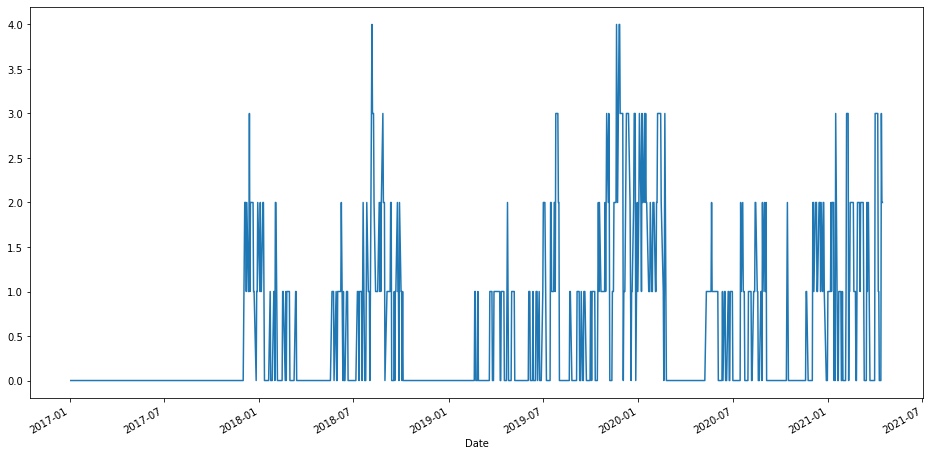

In [26]:
df_position['total'].plot(figsize=(16,8))

In [27]:
df_position[df_position['total'] == 0]

,AAPL,AMD,FAS,GE,JPM,total
Date,,,,,,
2017-01-03,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0
2017-01-06,0,0,0,0,0,0
2017-01-09,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-03-29,0,0,0,0,0,0
2021-03-30,0,0,0,0,0,0
2021-03-31,0,0,0,0,0,0


In [63]:
df_position.sum(axis=0)

AAPL     151
AMD      123
FAS      126
GE        56
JPM      104
total    560
dtype: int64

In [66]:
df_position[df_position['total']>0]

,AAPL,AMD,FAS,GE,JPM,total
Date,,,,,,
2017-12-04,0,0,1,0,1,2
2017-12-05,0,0,1,0,1,2
2017-12-06,0,0,1,0,1,2
2017-12-07,0,0,1,0,0,1
2017-12-08,0,0,1,0,1,2
...,...,...,...,...,...,...
2021-04-07,0,0,0,0,1,1
2021-04-08,0,0,0,0,1,1
2021-04-13,0,0,1,1,1,3


In [35]:
def pick_a_ticker(date):
    for ticker in stock_list:
        if df_position.loc[date,ticker] == 1:
            return ticker

In [52]:
def run_strategy():
    fund_occupied = False
    update_period = False
    for date in df_position.index:
        if update_period:
            results.loc[buy_date:date, 'strategy'] = df_strategy.loc[buy_date:date, ticker]
            results.loc[buy_date:date, 'ticker'] = ticker
            update_period = False
        if not fund_occupied and df_position.loc[date, 'total'] > 0:
            buy_date = date
            ticker = pick_a_ticker(date)
            fund_occupied = True
        if fund_occupied and df_signal.loc[date,ticker] == -1:
            sell_date = date
            fund_occupied = False
            update_period = True
            

In [53]:
results_columns = ['ticker', 'strategy']
results = pd.DataFrame(columns=results_columns, index=df_position.index)
run_strategy()

UnboundLocalError: local variable 'update_period' referenced before assignment

In [51]:
results['strategy'].fillna(0, inplace=True)
results

,ticker,strategy
Date,,
2017-01-03,NaN,0.00000
2017-01-04,NaN,0.00000
2017-01-05,NaN,0.00000
2017-01-06,NaN,0.00000
2017-01-09,NaN,0.00000
...,...,...
2021-04-09,NaN,0.00000
2021-04-12,NaN,0.00000
2021-04-13,FAS,-0.00000
